# DBSCAN

How to determine eps:
- https://en.wikipedia.org/wiki/Nearest_neighbor_graph

https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html

Dimension Reduction:
- https://builtin.com/data-science/tsne-python

### Sample Code:


In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Sample Code 2 - Applying DBSCAN to cluster non-spherical data

Number of clusters: 2
Homogeneity: 1.0
Completeness: 0.9514032557784387


NameError: name 'labels_true' is not defined

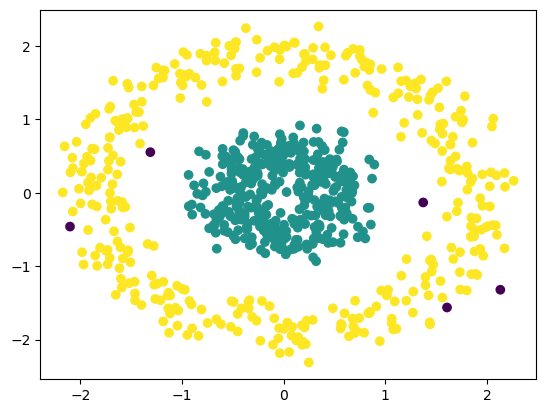

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

### Parameter Estimation


Every data mining task has the problem of parameters. Every parameter influences the algorithm in specific ways. For DBSCAN, the parameters ε and minPts are needed.

    minPts: As a rule of thumb, a minimum minPts can be derived from the number of dimensions D in the data set, as minPts ≥ D + 1. The low value minPts = 1 does not make sense, as then every point on its own will already be a cluster. With minPts ≤ 2, the result will be the same as of hierarchical clustering with the single link metric, with the dendrogram cut at height ε. Therefore, minPts must be chosen at least 3. However, larger values are usually better for data sets with noise and will yield more significant clusters. As a rule of thumb, minPts = 2·dim can be used, but it may be necessary to choose larger values for very large data, for noisy data or for data that contains many duplicates.

    ε: The value for ε can then be chosen by using a k-distance graph, plotting the distance to the k = minPts-1 nearest neighbor ordered from the largest to the smallest value. Good values of ε are where this plot shows an “elbow”: if ε is chosen much too small, a large part of the data will not be clustered; whereas for a too high value of ε, clusters will merge and the majority of objects will be in the same cluster. In general, small values of ε are preferable, and as a rule of thumb, only a small fraction of points should be within this distance of each other.
    
    Distance function: The choice of distance function is tightly linked to the choice of ε, and has a major impact on the outcomes. In general, it will be necessary to first identify a reasonable measure of similarity for the data set, before the parameter ε can be chosen. There is no estimation for this parameter, but the distance functions need to be chosen appropriately for the data set. 

In [ ]:
from sklearn.cluster import DBSCAN